In [6]:
from lxml import etree
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

sns.set(style='white')
sns.set_context('talk')
sns.despine()
%matplotlib inline

In [7]:
file_set = {'Src': glob("2015-12-15/*.xml"),
        'SrcGK': glob("2015-12-16/*.xml"),
        'AblGK': glob("2015-12-17/*.xml"),
        'Abl': glob("2015-12-18/*.xml"),
        'p38': glob("2016-01-26/*.xml")}
ligands = ['Bosutinib','Bosutinib Isomer','Erlotinib','Gefitinib']

In [8]:
#This function allows us to import xml format data files and convert them to a pandas dataframe
def xml2df(file):

    root = etree.parse(file)

    data = []

    reads = root.xpath("/*/Section[1]/*/Well")

    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(s.text, float(s.attrib['WL']), r.attrib['Pos'])
        for r in reads
        for s in r]

    dataframe = pd.DataFrame(data, columns=['fluorescence','wavelength (nm)','Well'])
            
    ### dataframe_rep replaces 'OVER' (when fluorescence signal maxes out) with '3289277', an arbitrarily high number

    dataframe_rep = dataframe.replace({'OVER':'3289277'})

    dataframe_rep[['fluorescence']] = dataframe_rep[['fluorescence']].astype('float')
            
    dataframe_pivot = pd.pivot_table(dataframe_rep, index = 'wavelength (nm)', columns = ['Well'])
    
    #Rearrange columns so they're in the right order
    cols =  dataframe_pivot['fluorescence'].columns.tolist()
    cols = [cols[0]] + cols[4:12] + cols[1:4] + [cols[13]] + cols[17:25] + cols[14:17]
    dataframe_reindex =  dataframe_pivot.reindex_axis(cols,level='Well',axis=1)
    
    return dataframe_reindex

In [39]:
#This function allows us to plot spectra
def plot_spectra_grid(file_set,protein,ligands,ligand):
    grid = len(protein) + len(ligand)
    
    # pick the correct file
    proteins = file_set.keys()
    index = ligands.index(ligand)
    file = file_set[protein][index]
    
    # pick a title
    title = "%s - %s" %(protein, ligand)
    
    df = xml2df(file)
    
    # plot the spectra
    fig = plt.figure();
    ax = df['fluorescence'].iloc[:,12].plot(ylim=(0,100000),legend=False, linewidth=4,color='m');
    ax.axvline(x=480,color='0.7',linestyle='--');
    for i in range(11):
        #s = df['fluorescence'].iloc[:,i].plot(ylim=(0,100000),linewidth=3,c=cm.hsv(i*15), ax = ax, title=title);
        df['fluorescence'].iloc[:,i].plot(ylim=(0,100000),linewidth=3,c=cm.hsv(i*15), ax = ax);
        df['fluorescence'].iloc[:,11+i].plot(ylim=(0,100000),legend=False, linewidth=4,c=cm.gray(i*15+50), ax = ax, fontsize =20);
    sns.despine()
    plt.xlim(320,600)
    plt.yticks([])
    plt.xlabel('wavelength (nm)', fontsize=20)
    plt.tight_layout();
    plt.savefig('%s.eps'%title, type='eps', dpi=1000)
    # The s = line above and this an attempt at making a color bar that so far has not worked
    #cbar = plt.colorbar(mappable=s, ax=ax)
    #cbar.set_label('My Label')
    

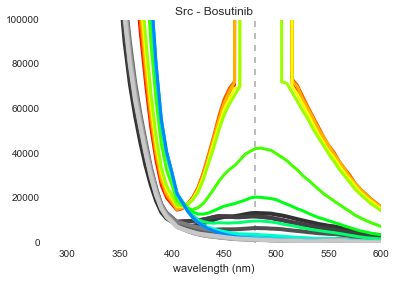

In [5]:
#You can use it to generate a single plot
plot_spectra_grid(file_set,'Src',ligands,'Bosutinib')

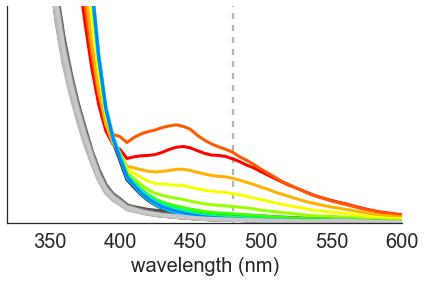

In [40]:
#You can use it to generate a single plot
plot_spectra_grid(file_set,'Src',ligands,'Gefitinib')

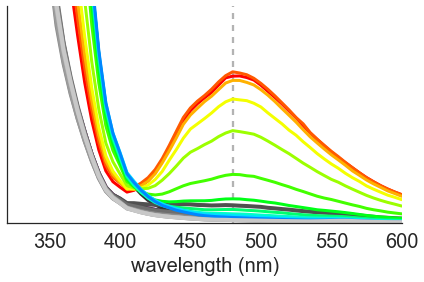

In [41]:
#You can use it to generate a single plot
plot_spectra_grid(file_set,'Src',ligands,'Bosutinib Isomer')

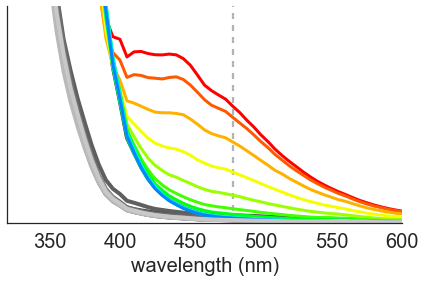

In [42]:
plot_spectra_grid(file_set,'Abl',ligands,'Gefitinib')

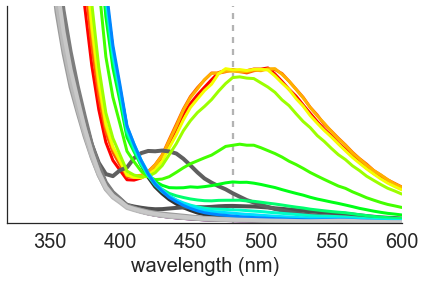

In [43]:
plot_spectra_grid(file_set,'Abl',ligands,'Bosutinib Isomer')

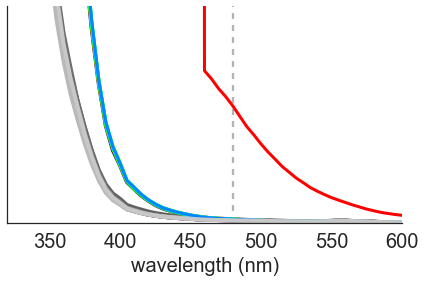

In [44]:
plot_spectra_grid(file_set,'p38',ligands,'Gefitinib')

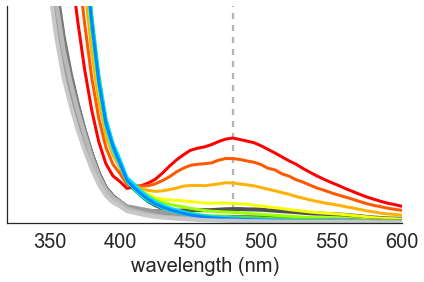

In [45]:
plot_spectra_grid(file_set,'p38',ligands,'Bosutinib Isomer')